In [1]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 18.8 MB/s eta 0:00:00


In [2]:

# INSTALLING **PACKAGES**


!pip install statsmodels



!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


In [6]:
import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df

,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon
Date,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False
2013-01-02 00:00:00,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False
2013-01-03 00:00:00,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False
2013-01-04 00:00:00,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False
2013-01-05 00:00:00,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False
2023-12-28 00:00:00,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False
2023-12-29 00:00:00,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False


In [7]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import plotly.graph_objects as go

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Load your dataset
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a file

# Compute ACF values
acf_values, confint = sm.tsa.acf(df['WS10M'].dropna(), nlags=50, alpha=0.05)

# Extract lower and upper confidence intervals
lower_bound = confint[:, 0] - acf_values
upper_bound = confint[:, 1] - acf_values

# Create interactive plot
fig = go.Figure()

# ACF bars
fig.add_trace(go.Bar(
    x=list(range(len(acf_values))),
    y=acf_values,
    name="ACF",
    marker_color='blue'
))

# Confidence intervals
fig.add_trace(go.Scatter(
    x=list(range(len(acf_values))),
    y=upper_bound,
    mode='lines',
    name="Upper Bound",
    line=dict(color='red', dash='dot')
))
fig.add_trace(go.Scatter(
    x=list(range(len(acf_values))),
    y=lower_bound,
    mode='lines',
    name="Lower Bound",
    line=dict(color='red', dash='dot')
))

# Formatting
fig.update_layout(
    title="Interactive Autocorrelation Function (ACF) Plot of WS10M",
    xaxis_title="Lags",
    yaxis_title="Autocorrelation",
    template="plotly_white",
    hovermode="x"
)

fig.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Example: Assuming 'df' contains the WS column and you want to create lagged terms
lags = range(1, 47)  # 50 lags from 1 to 50

# Create lagged features for WS
df_lagged = pd.DataFrame({f'WS_lag_{lag}': df['WS10M'].shift(lag) for lag in lags})
df_lagged


# Add the target variable WS10M to the DataFrame (ensure it's in the same length)
df_lagged['WS10M'] = df['WS10M']  # You might need to replace this with actual WS10M data

# Drop any rows with NaN values caused by shifting
df_lagged = df_lagged.dropna()
df_lagged

,WS_lag_1,WS_lag_2,WS_lag_3,WS_lag_4,WS_lag_5,WS_lag_6,WS_lag_7,WS_lag_8,WS_lag_9,WS_lag_10,...,WS_lag_38,WS_lag_39,WS_lag_40,WS_lag_41,WS_lag_42,WS_lag_43,WS_lag_44,WS_lag_45,WS_lag_46,WS10M
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-16 00:00:00,2.52,3.47,4.22,5.34,4.94,4.58,2.48,1.48,3.00,2.61,...,4.19,3.61,4.66,4.52,5.79,5.74,4.75,4.25,3.99,1.90
2013-02-17 00:00:00,1.90,2.52,3.47,4.22,5.34,4.94,4.58,2.48,1.48,3.00,...,5.41,4.19,3.61,4.66,4.52,5.79,5.74,4.75,4.25,1.60
2013-02-18 00:00:00,1.60,1.90,2.52,3.47,4.22,5.34,4.94,4.58,2.48,1.48,...,5.95,5.41,4.19,3.61,4.66,4.52,5.79,5.74,4.75,2.17
2013-02-19 00:00:00,2.17,1.60,1.90,2.52,3.47,4.22,5.34,4.94,4.58,2.48,...,5.80,5.95,5.41,4.19,3.61,4.66,4.52,5.79,5.74,2.26
2013-02-20 00:00:00,2.26,2.17,1.60,1.90,2.52,3.47,4.22,5.34,4.94,4.58,...,5.64,5.80,5.95,5.41,4.19,3.61,4.66,4.52,5.79,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,6.01,4.29,3.64,4.31,5.00,2.38,3.76,4.01,2.30,3.39,...,1.71,2.76,1.90,1.55,3.34,4.30,2.97,2.57,2.14,6.43
2023-12-28 00:00:00,6.43,6.01,4.29,3.64,4.31,5.00,2.38,3.76,4.01,2.30,...,1.32,1.71,2.76,1.90,1.55,3.34,4.30,2.97,2.57,3.93
2023-12-29 00:00:00,3.93,6.43,6.01,4.29,3.64,4.31,5.00,2.38,3.76,4.01,...,2.15,1.32,1.71,2.76,1.90,1.55,3.34,4.30,2.97,2.59


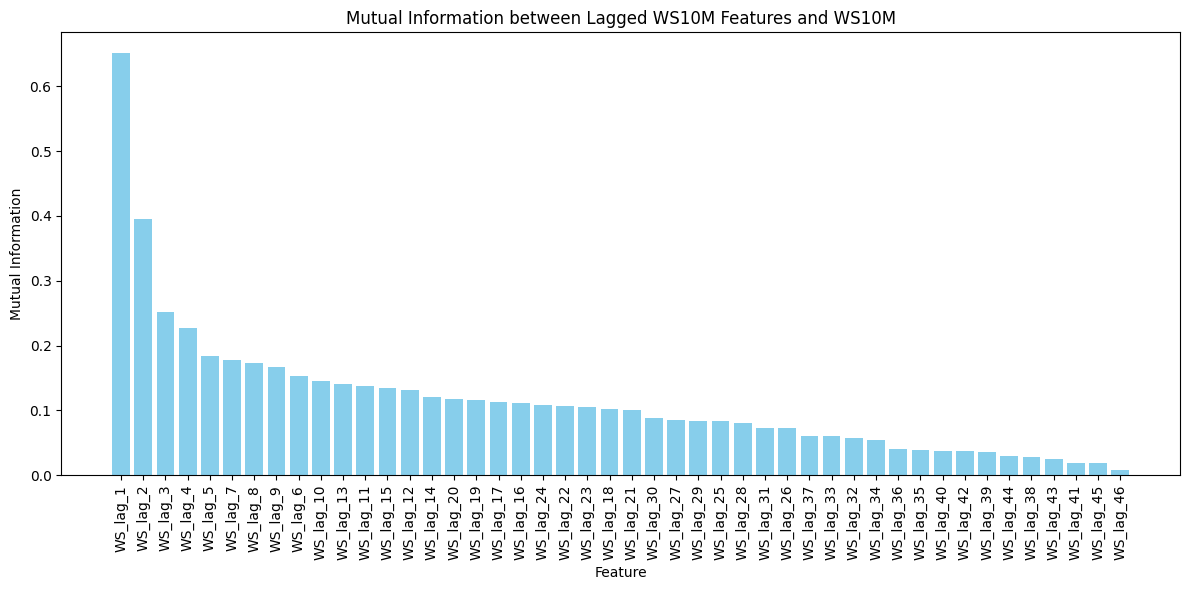

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Set random seed for reproducibility
np.random.seed(42)

# Prepare the data
X = df_lagged.drop(columns=['WS10M'])  # Features (lagged)
y = df_lagged['WS10M']                 # Target variable

# Calculate mutual information (with fixed random_state)
mutual_info = mutual_info_regression(X, y, random_state=42)

# Create DataFrame of results
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(mutual_info_df['Feature'], mutual_info_df['Mutual Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information between Lagged WS10M Features and WS10M')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [10]:
mutual_info_df["Feature"].unique()

array(['WS_lag_1', 'WS_lag_2', 'WS_lag_3', 'WS_lag_4', 'WS_lag_5',
       'WS_lag_7', 'WS_lag_8', 'WS_lag_9', 'WS_lag_6', 'WS_lag_10',
       'WS_lag_13', 'WS_lag_11', 'WS_lag_15', 'WS_lag_12', 'WS_lag_14',
       'WS_lag_20', 'WS_lag_19', 'WS_lag_17', 'WS_lag_16', 'WS_lag_24',
       'WS_lag_22', 'WS_lag_23', 'WS_lag_18', 'WS_lag_21', 'WS_lag_30',
       'WS_lag_27', 'WS_lag_29', 'WS_lag_25', 'WS_lag_28', 'WS_lag_31',
       'WS_lag_26', 'WS_lag_37', 'WS_lag_33', 'WS_lag_32', 'WS_lag_34',
       'WS_lag_36', 'WS_lag_35', 'WS_lag_40', 'WS_lag_42', 'WS_lag_39',
       'WS_lag_44', 'WS_lag_38', 'WS_lag_43', 'WS_lag_41', 'WS_lag_45',
       'WS_lag_46'], dtype=object)

## LInear Regression

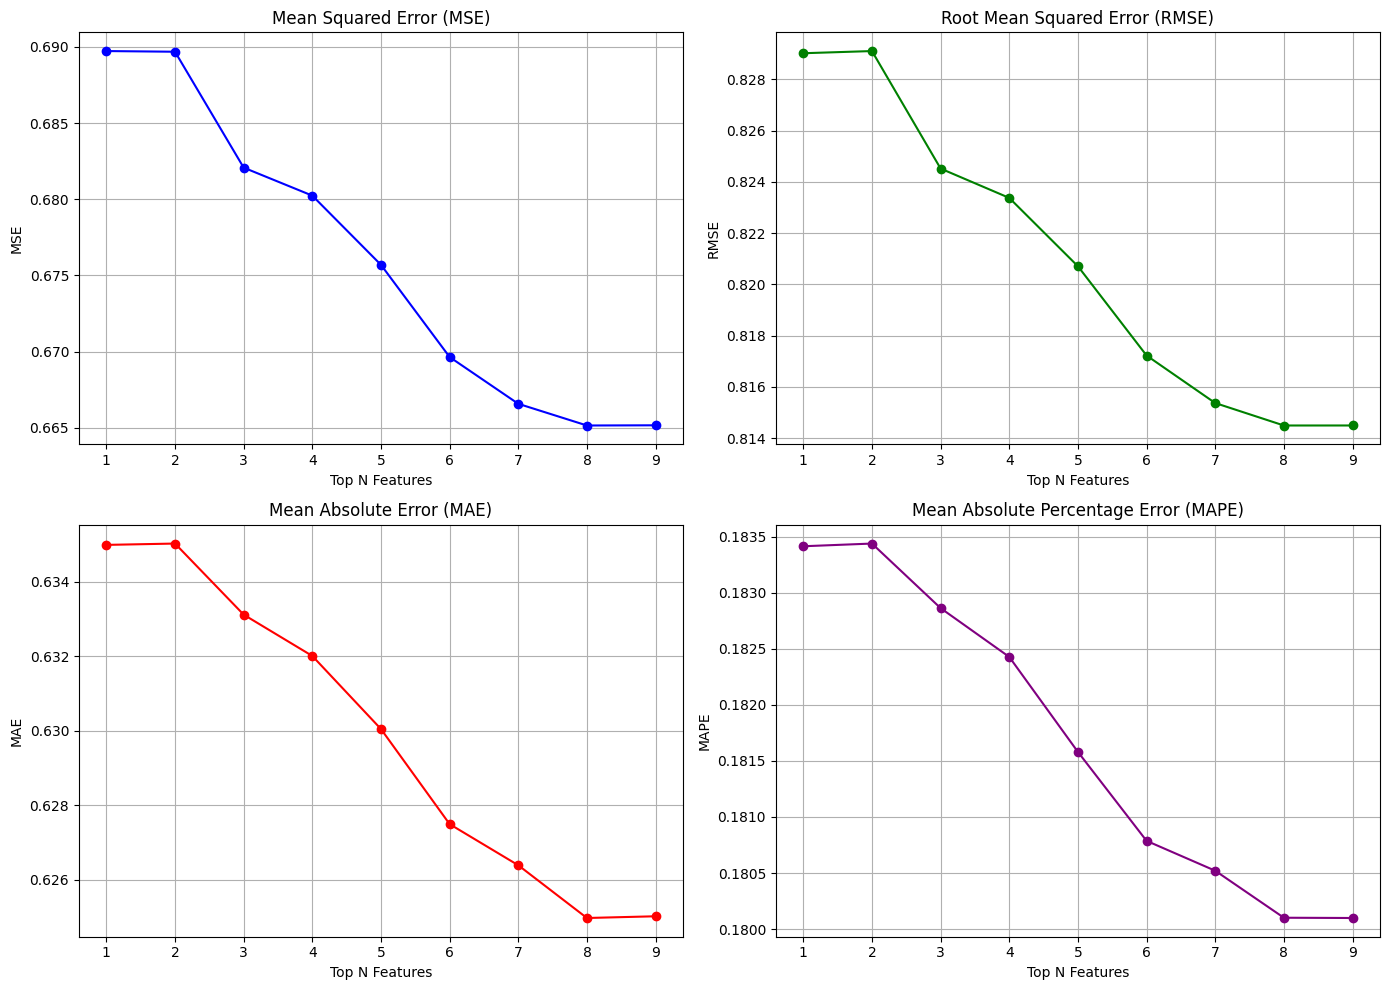

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Function to perform time series cross-validation and return the metrics
def cross_validate_model(X, y, selected_features):
    X_selected = X[selected_features]
    model = LinearRegression()
    tscv = TimeSeriesSplit(n_splits=5)

    mse_scores, rmse_scores, mae_scores, mape_scores = [], [], [], []

    for train_index, test_index in tscv.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        rmse_scores.append(np.sqrt(mse_scores[-1]))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))

    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(mae_scores), np.mean(mape_scores)

# Loop through different numbers of top features
top_features_counts = list(range(1, 10))
results_mse, results_rmse, results_mae, results_mape = {}, {}, {}, {}

X_all = df_lagged.drop(columns=['WS10M'])
y = df_lagged['WS10M']

for n in top_features_counts:
    selected_features = mutual_info_df.head(n)['Feature'].tolist()
    mse, rmse, mae, mape = cross_validate_model(X_all, y, selected_features)

    results_mse[n] = mse
    results_rmse[n] = rmse
    results_mae[n] = mae
    results_mape[n] = mape

# Convert results to list for plotting
top_n_features = top_features_counts
mse_values = list(results_mse.values())
rmse_values = list(results_rmse.values())
mae_values = list(results_mae.values())
mape_values = list(results_mape.values())

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(top_n_features, mse_values, marker='o', color='b')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xlabel('Top N Features')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].grid(True)

axs[0, 1].plot(top_n_features, rmse_values, marker='o', color='g')
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[0, 1].set_xlabel('Top N Features')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].grid(True)

axs[1, 0].plot(top_n_features, mae_values, marker='o', color='r')
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 0].set_xlabel('Top N Features')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].grid(True)

axs[1, 1].plot(top_n_features, mape_values, marker='o', color='purple')
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axs[1, 1].set_xlabel('Top N Features')
axs[1, 1].set_ylabel('MAPE')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


## LSTM

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21

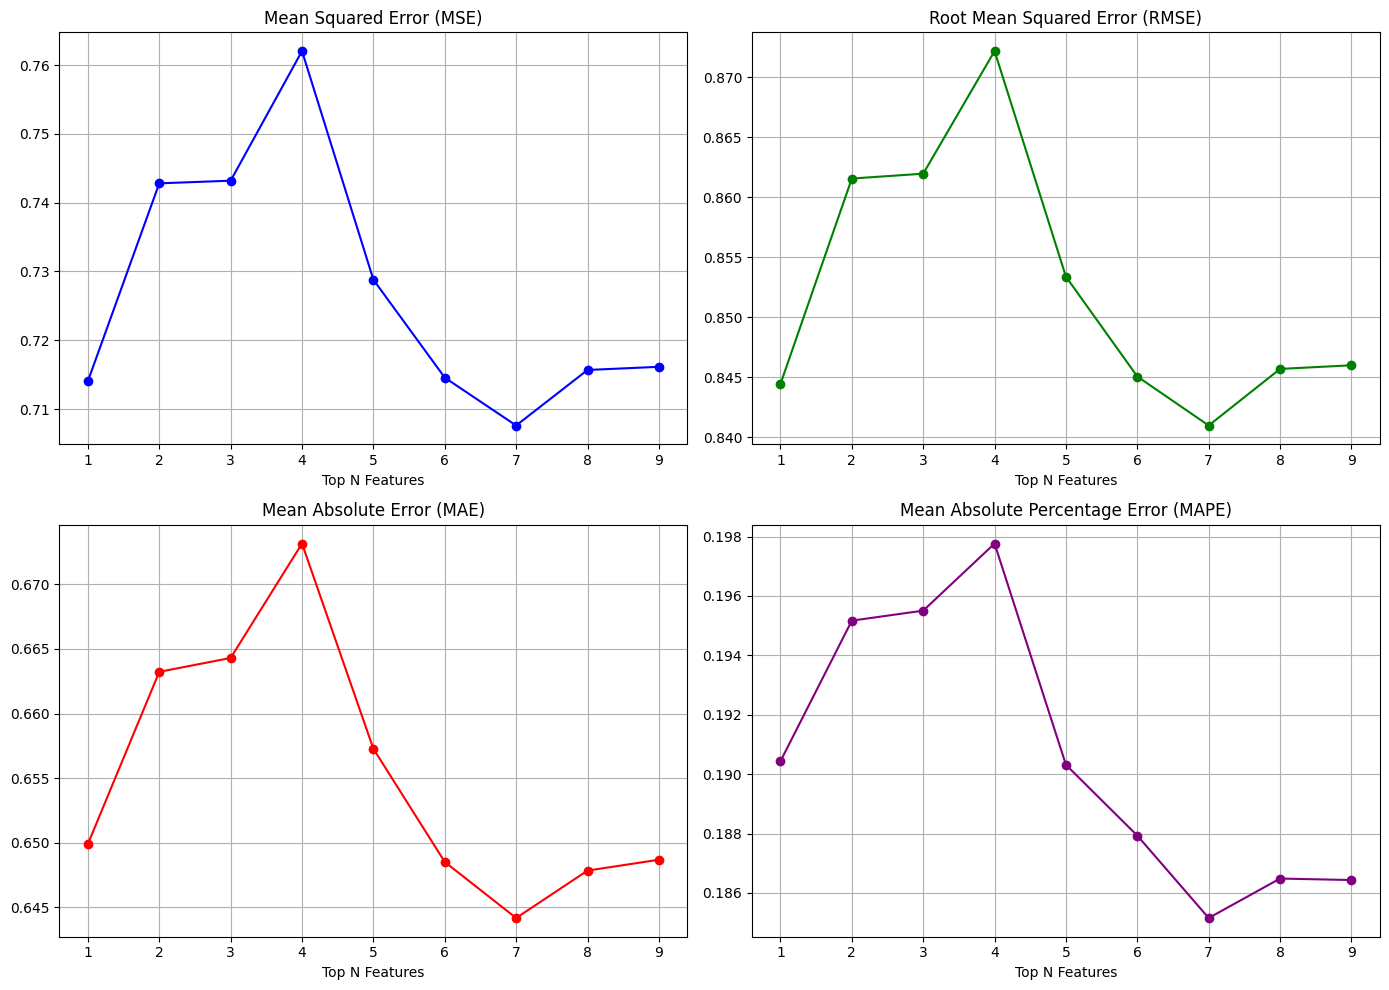

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# ---------------------
# Set random seed
# ---------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Function to perform time series cross-validation and return the metrics
def cross_validate_model(X, y, selected_features):
    X_selected = X[selected_features]
    X_selected = X_selected.values.reshape(X_selected.shape[0], 1, X_selected.shape[1])

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(X_selected.shape[1], X_selected.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')

    tscv = TimeSeriesSplit(n_splits=5)
    mse_scores, rmse_scores, mae_scores, mape_scores = [], [], [], []

    for train_index, test_index in tscv.split(X_selected):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        rmse_scores.append(np.sqrt(mse_scores[-1]))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))

    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(mae_scores), np.mean(mape_scores)

# Loop through different numbers of top features
top_features_counts = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_mse, results_rmse, results_mae, results_mape = {}, {}, {}, {}

for n in top_features_counts:
    selected_features = mutual_info_df.head(n)['Feature']
    mse, rmse, mae, mape = cross_validate_model(df_lagged.drop(columns=['WS10M']), y, selected_features)

    results_mse[n] = mse
    results_rmse[n] = rmse
    results_mae[n] = mae
    results_mape[n] = mape

# Plotting results
top_n_features = list(results_mse.keys())
mse_values = list(results_mse.values())
rmse_values = list(results_rmse.values())
mae_values = list(results_mae.values())
mape_values = list(results_mape.values())

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(top_n_features, mse_values, marker='o', color='b')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 1].plot(top_n_features, rmse_values, marker='o', color='g')
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].plot(top_n_features, mae_values, marker='o', color='r')
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 1].plot(top_n_features, mape_values, marker='o', color='purple')
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')

for ax in axs.flat:
    ax.set_xlabel('Top N Features')
    ax.grid(True)

plt.tight_layout()
plt.show()


## RF Errors

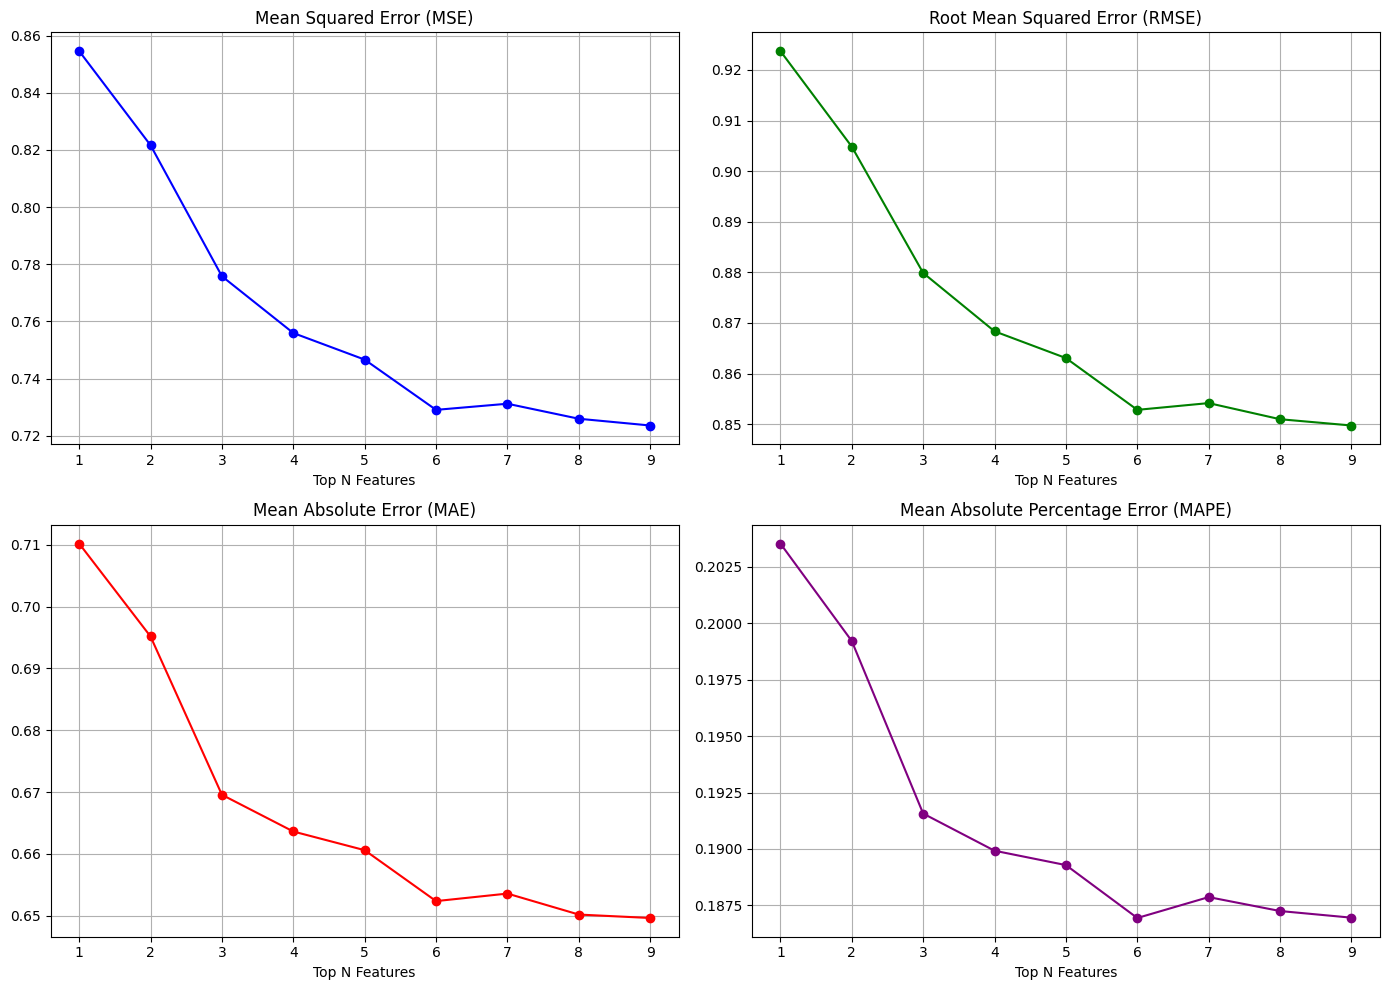

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Function to perform time series cross-validation and return the metrics
def cross_validate_model(X, y, selected_features):
    X_selected = X[selected_features]

    # Set random_state for reproducibility
    model = RandomForestRegressor(random_state=SEED)

    tscv = TimeSeriesSplit(n_splits=5)

    mse_scores, rmse_scores, mae_scores, mape_scores = [], [], [], []

    for train_index, test_index in tscv.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        mape_scores.append(mape)

    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(mae_scores), np.mean(mape_scores)

# Loop through different numbers of top features
top_features_counts = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_mse, results_rmse, results_mae, results_mape = {}, {}, {}, {}

for n in top_features_counts:
    selected_features = mutual_info_df.head(n)['Feature']
    mse, rmse, mae, mape = cross_validate_model(df_lagged.drop(columns=['WS10M']), y, selected_features)

    results_mse[n] = mse
    results_rmse[n] = rmse
    results_mae[n] = mae
    results_mape[n] = mape

# Plotting
top_n_features = list(results_mse.keys())
mse_values = list(results_mse.values())
rmse_values = list(results_rmse.values())
mae_values = list(results_mae.values())
mape_values = list(results_mape.values())

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(top_n_features, mse_values, marker='o', color='b')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 1].plot(top_n_features, rmse_values, marker='o', color='g')
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].plot(top_n_features, mae_values, marker='o', color='r')
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 1].plot(top_n_features, mape_values, marker='o', color='purple')
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')

for ax in axs.flat:
    ax.set_xlabel('Top N Features')
    ax.grid(True)

plt.tight_layout()
plt.show()


## XGB

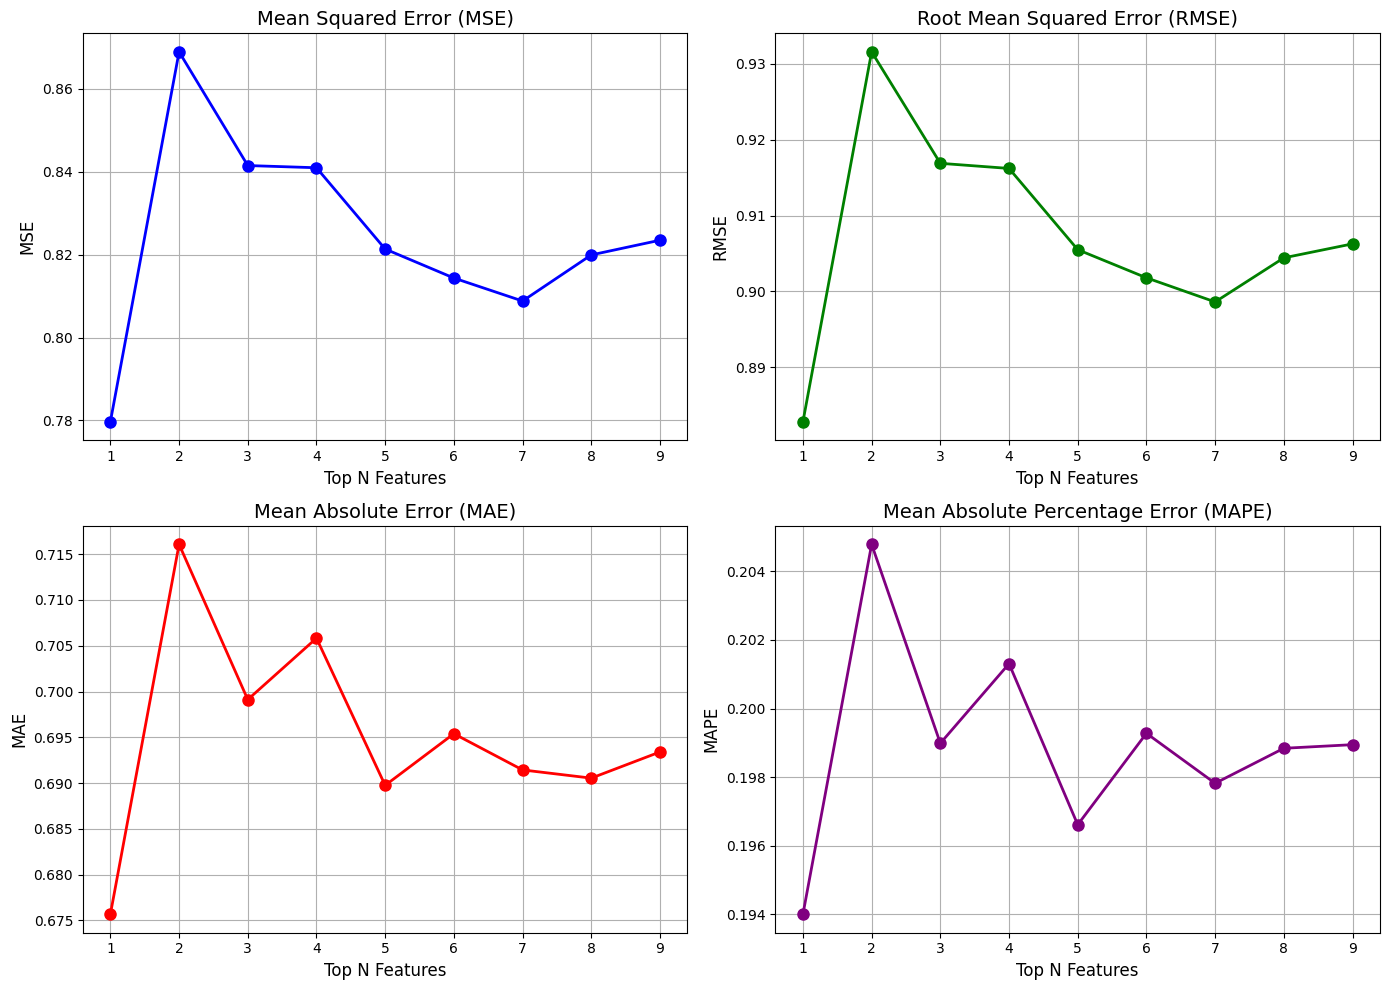

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

seed = 42  # fixed random seed

# Set numpy random seed for reproducibility
np.random.seed(seed)

# Function to perform time series cross-validation and return the metrics
def cross_validate_model(X, y, selected_features):
    X_selected = X[selected_features]
    # Pass random_state to XGBRegressor for reproducibility
    model = XGBRegressor(random_state=seed)

    # Initialize TimeSeriesSplit (using 5 splits, can be adjusted)
    tscv = TimeSeriesSplit(n_splits=5)

    mse_scores = []
    rmse_scores = []
    mae_scores = []
    mape_scores = []

    # Perform time series cross-validation
    for train_index, test_index in tscv.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        rmse = np.sqrt(mse)
        rmse_scores.append(rmse)

        mae = mean_absolute_error(y_test, y_pred)
        mae_scores.append(mae)

        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_scores.append(mape)

    # Return average metrics across folds
    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(mae_scores), np.mean(mape_scores)

# Loop through different numbers of top features
top_features_counts = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_mse = {}
results_rmse = {}
results_mae = {}
results_mape = {}

for n in top_features_counts:
    # Select top N features based on mutual information
    selected_features = mutual_info_df.head(n)['Feature']

    # Compute cross-validated metrics
    mse, rmse, mae, mape = cross_validate_model(df_lagged.drop(columns=['WS10M']), y, selected_features)

    results_mse[n] = mse
    results_rmse[n] = rmse
    results_mae[n] = mae
    results_mape[n] = mape

# Prepare data for plotting
top_n_features = list(results_mse.keys())
mse_values = list(results_mse.values())
rmse_values = list(results_rmse.values())
mae_values = list(results_mae.values())
mape_values = list(results_mape.values())

# Plotting results
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# MSE plot
axs[0, 0].plot(top_n_features, mse_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
axs[0, 0].set_title('Mean Squared Error (MSE)', fontsize=14)
axs[0, 0].set_xlabel('Top N Features', fontsize=12)
axs[0, 0].set_ylabel('MSE', fontsize=12)
axs[0, 0].grid(True)

# RMSE plot
axs[0, 1].plot(top_n_features, rmse_values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
axs[0, 1].set_title('Root Mean Squared Error (RMSE)', fontsize=14)
axs[0, 1].set_xlabel('Top N Features', fontsize=12)
axs[0, 1].set_ylabel('RMSE', fontsize=12)
axs[0, 1].grid(True)

# MAE plot
axs[1, 0].plot(top_n_features, mae_values, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
axs[1, 0].set_title('Mean Absolute Error (MAE)', fontsize=14)
axs[1, 0].set_xlabel('Top N Features', fontsize=12)
axs[1, 0].set_ylabel('MAE', fontsize=12)
axs[1, 0].grid(True)

# MAPE plot
axs[1, 1].plot(top_n_features, mape_values, marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)', fontsize=14)
axs[1, 1].set_xlabel('Top N Features', fontsize=12)
axs[1, 1].set_ylabel('MAPE', fontsize=12)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


## SVM

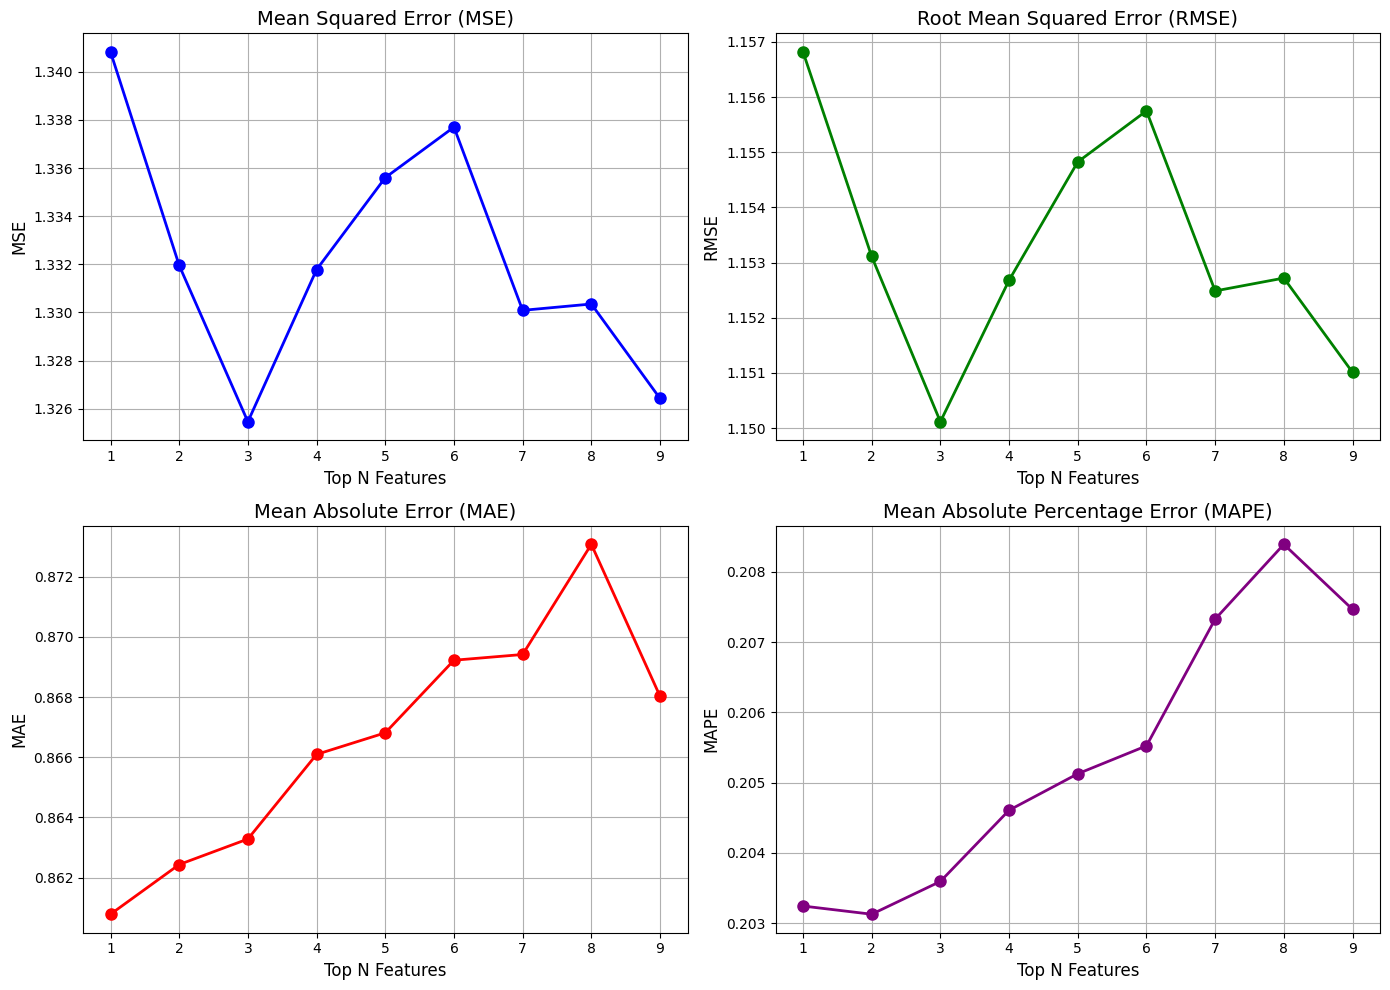

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Function to perform time series cross-validation and return the metrics
def cross_validate_model(X, y, selected_features):
    X_selected = X[selected_features]
    model = SVR()

    # Initialize TimeSeriesSplit (using 5 splits, you can adjust this)
    tscv = TimeSeriesSplit(n_splits=5)

    mse_scores = []
    rmse_scores = []
    mae_scores = []
    mape_scores = []

    # Perform time series cross-validation
    for train_index, test_index in tscv.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate MSE, RMSE, MAE, and MAPE for each fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        rmse = np.sqrt(mse)  # RMSE is the square root of MSE
        rmse_scores.append(rmse)

        mae = mean_absolute_error(y_test, y_pred)
        mae_scores.append(mae)

        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_scores.append(mape)

    # Return the mean values of the metrics
    mean_mse = np.mean(mse_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_mae = np.mean(mae_scores)
    mean_mape = np.mean(mape_scores)

    return mean_mse, mean_rmse, mean_mae, mean_mape

# Loop through different numbers of top features
top_features_counts = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_mse = {}
results_rmse = {}
results_mae = {}
results_mape = {}

for n in top_features_counts:
    # Get the top N features based on mutual information
    selected_features = mutual_info_df.head(n)['Feature']

    # Perform time series cross-validation and compute the metrics
    mse, rmse, mae, mape = cross_validate_model(df_lagged.drop(columns=['WS10M']), y, selected_features)

    results_mse[n] = mse
    results_rmse[n] = rmse
    results_mae[n] = mae
    results_mape[n] = mape

# Convert results to a list for plotting
top_n_features = list(results_mse.keys())
mse_values = list(results_mse.values())
rmse_values = list(results_rmse.values())
mae_values = list(results_mae.values())
mape_values = list(results_mape.values())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# MSE Plot
axs[0, 0].plot(top_n_features, mse_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
axs[0, 0].set_title('Mean Squared Error (MSE)', fontsize=14)
axs[0, 0].set_xlabel('Top N Features', fontsize=12)
axs[0, 0].set_ylabel('MSE', fontsize=12)
axs[0, 0].grid(True)

# RMSE Plot
axs[0, 1].plot(top_n_features, rmse_values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
axs[0, 1].set_title('Root Mean Squared Error (RMSE)', fontsize=14)
axs[0, 1].set_xlabel('Top N Features', fontsize=12)
axs[0, 1].set_ylabel('RMSE', fontsize=12)
axs[0, 1].grid(True)

# MAE Plot
axs[1, 0].plot(top_n_features, mae_values, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
axs[1, 0].set_title('Mean Absolute Error (MAE)', fontsize=14)
axs[1, 0].set_xlabel('Top N Features', fontsize=12)
axs[1, 0].set_ylabel('MAE', fontsize=12)
axs[1, 0].grid(True)

# MAPE Plot
axs[1, 1].plot(top_n_features, mape_values, marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)', fontsize=14)
axs[1, 1].set_xlabel('Top N Features', fontsize=12)
axs[1, 1].set_ylabel('MAPE', fontsize=12)
axs[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Conclusion

Consider 3 top lags 'WS_lag_1', 'WS_lag_2', 'WS_lag_3'